In [36]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
ticker = "^BVSP"
start = "2021-01-01"
end = "2022-02-11"

In [45]:
dataframe = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [46]:
dataframe.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400
2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100
2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200
2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800
2021-01-08,122387.0,125324.0,122386.0,125077.0,125077.0,11085800
2021-01-11,125075.0,125075.0,122506.0,122807.0,122807.0,9537600
2021-01-12,123255.0,124584.0,123227.0,123998.0,123998.0,8949000
2021-01-13,123996.0,124032.0,121016.0,122040.0,122040.0,10291500
2021-01-14,121947.0,123896.0,121947.0,123481.0,123481.0,8974400


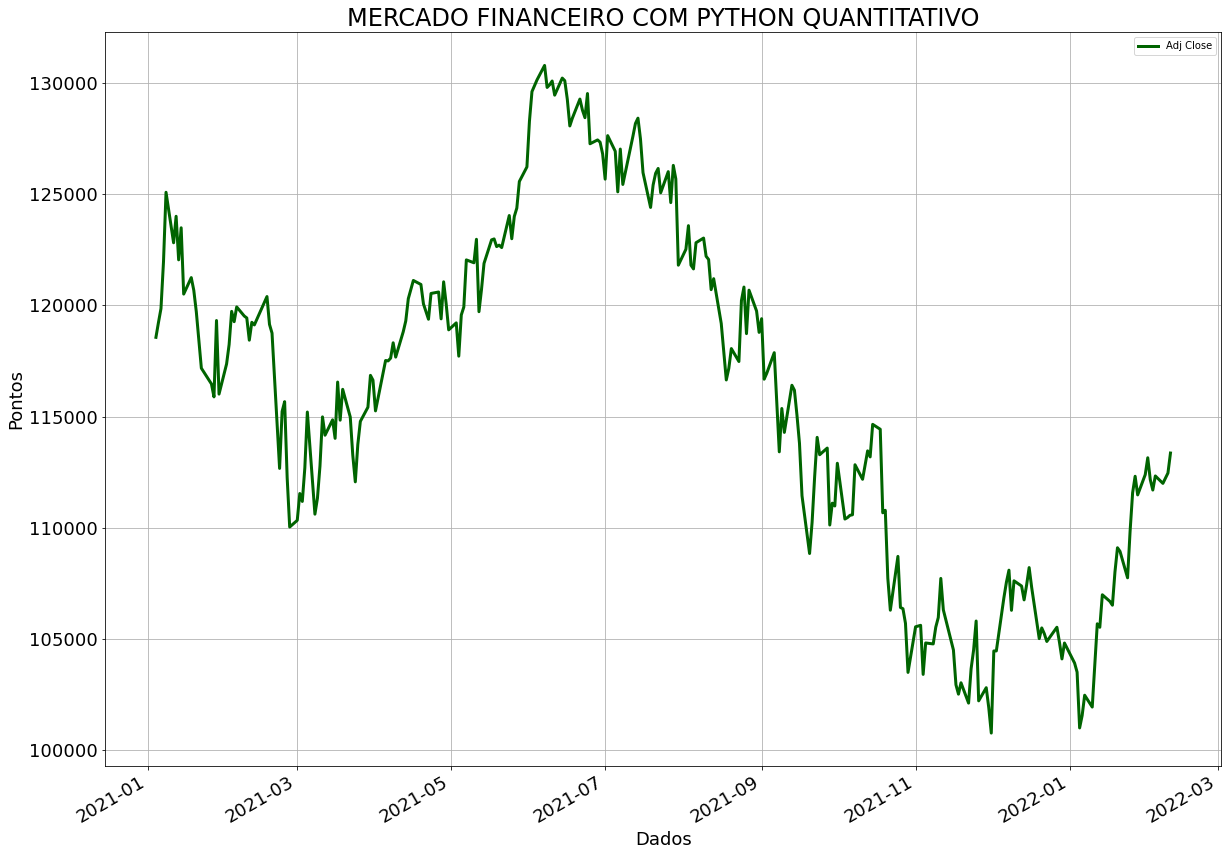

In [47]:
dataframe['Adj Close'].plot(
    grid = True, 
    figsize=(20,15), 
    linewidth = 3, 
    fontsize = 18, 
    color = 'darkgreen'
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()

In [48]:
period = 21
dispersion = 2

dataframe['desvio'] = dataframe['Adj Close'].rolling(period).std()
dataframe['MM'] = dataframe['Adj Close'].rolling(period).mean()
dataframe['Banda_Superior'] = dataframe['MM'] + (dataframe['desvio'] * dispersion)
dataframe['Banda_Inferior'] = dataframe['MM'] - (dataframe['desvio'] * dispersion)

In [49]:
dataframe = dataframe.dropna(axis = 0)

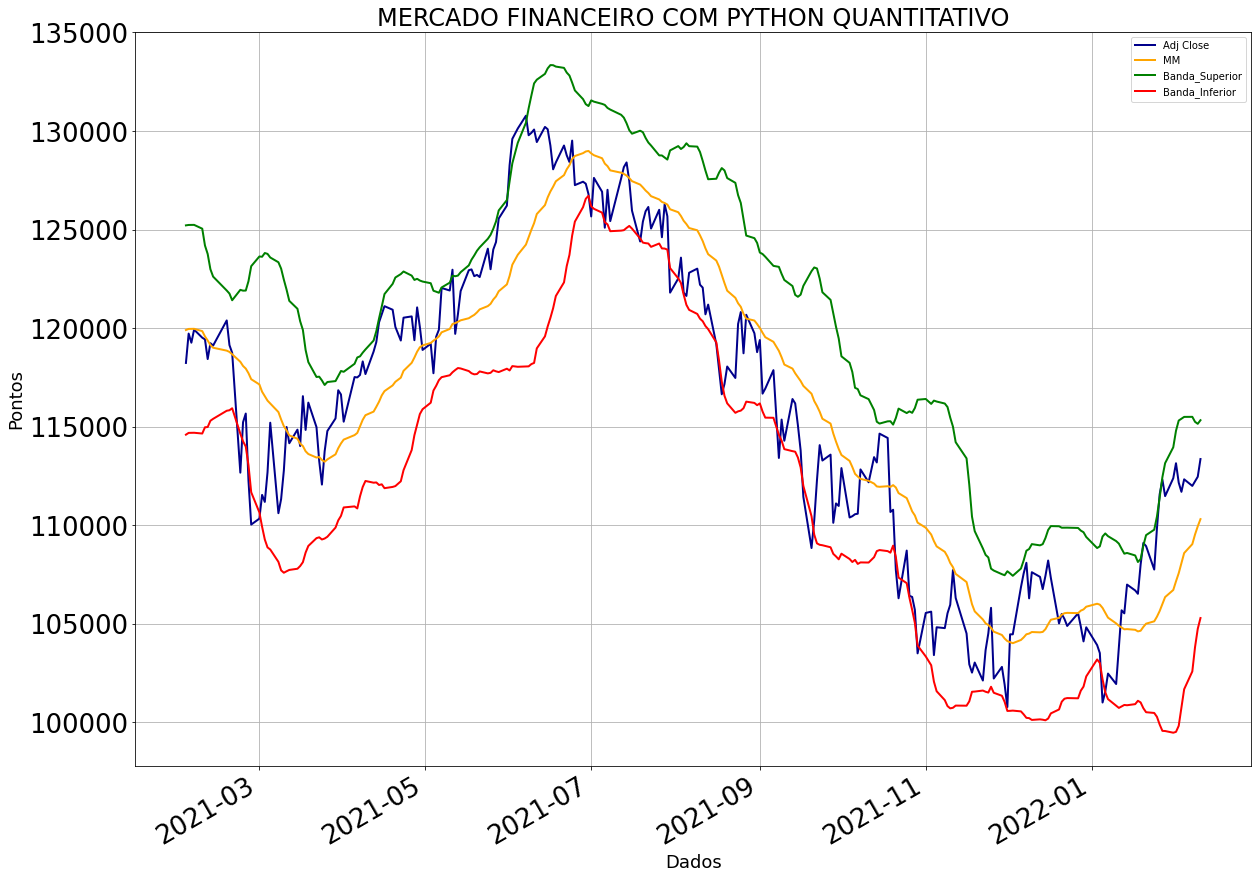

In [50]:
dataframe[['Adj Close', 'MM', 'Banda_Superior', 'Banda_Inferior']].plot(
    grid = True,
    figsize = (20, 15),
    linewidth = 2,
    fontsize = 26,
    color = ['darkblue', 'orange', 'green', 'red']  
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()